<a href="https://colab.research.google.com/github/harivilasp/Autocomplete-typeahead-suggestion/blob/master/MPNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn.datasets
import numpy as np

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
X=breast_cancer.data
Y=breast_cancer.target

In [0]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [0]:
import pandas as pd

In [0]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class']=breast_cancer.target

In [0]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [0]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# train Test

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=data.drop('class',axis=1)
Y=data['class']

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1, stratify=Y) # maintains ratio of malignen and other in train and test

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1, stratify=Y, random_state=1) # without random state it will change values everytime.

# Binarisation of input

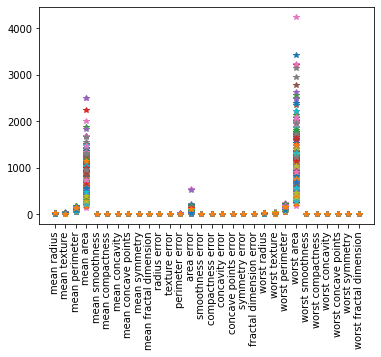

In [0]:
import matplotlib.pyplot as plt
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show();

In [0]:
X_binarised_3_train = X_train['mean area'].map(lambda x: 0 if x<1000 else 1)

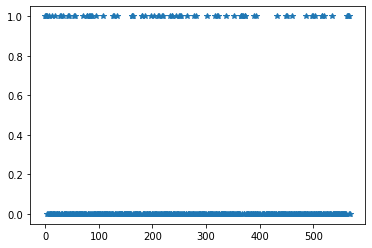

In [0]:
plt.plot(X_binarised_3_train,"*")

In [0]:
# to do this in one go
X_binarised_train=X_train.apply(pd.cut, bins=2,labels=[0,1])
X_binarised_test=X_test.apply(pd.cut, bins=2,labels=[0,1])

In [0]:
# converting form dataframe to number values
X_binarised_train=X_binarised_train.values
X_binarised_test=X_binarised_test.values

In [0]:
type(X_binarised_test)

numpy.ndarray

# MP Neuron Model

In [0]:

b=3
i=100

#i= randint(0, X_binarised_train.shape[0])
print('for row ',i)
if(np.sum(X_binarised_train[100,:])>=b):
  print("MP Neuron inference is malignant")
else:
  print("MP Neuron inference is benign")
if(Y_train[i]==1):
  print("ground is malignant")
else:
  print("ground truth is benign")

for row  100
MP Neuron inference is benign
ground truth is benign


In [0]:
from random import randint

In [0]:
b=3
Y_pred_train=[]
accurate_rows=0;

for x,y in zip(X_binarised_train,Y_train):
  y_pred=(np.sum(x)>=b);
  Y_pred_train.append(y_pred)
  accurate_rows += (y==y_pred)

print(accurate_rows, accurate_rows/X_binarised_train.shape[0])

77 0.150390625


In [0]:
X_binarised_train.shape

(512, 30)

In [0]:
for b in range(X_binarised_train.shape[1]+1):
  Y_pred_train=[]
  accurate_rows=0;
  for x,y in zip(X_binarised_train,Y_train):
    y_pred=(np.sum(x)>=b);
    Y_pred_train.append(y_pred)
    accurate_rows += (y==y_pred)

  print(accurate_rows, accurate_rows/X_binarised_train.shape[0])

321 0.626953125
123 0.240234375
95 0.185546875
77 0.150390625
79 0.154296875
93 0.181640625
110 0.21484375
125 0.244140625
141 0.275390625
153 0.298828125
160 0.3125
168 0.328125
172 0.3359375
176 0.34375
180 0.3515625
183 0.357421875
188 0.3671875
189 0.369140625
191 0.373046875
191 0.373046875
191 0.373046875
191 0.373046875
191 0.373046875
191 0.373046875
191 0.373046875
191 0.373046875
191 0.373046875
191 0.373046875
191 0.373046875
191 0.373046875
191 0.373046875


In [0]:
# we got only 62% but if we flip [1,0] in binirisation accuracy will go 84% so need of correct binairisation

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
print(Y_test.shape,len(Y_pred_test),X_bina)

(57,) 512


In [0]:
for b in range(X_binarised_test.shape[1]+1):
  Y_pred_test=[]
  #accurate_rows=0;
  for x in X_binarised_test:
    y_pred=(np.sum(x)>=b);
    Y_pred_test.append(y_pred)
    #accurate_rows += (y==y_pred)
  accuracy=accuracy_score(Y_pred_test, Y_test)
  print(b, accuracy)

0 0.631578947368421
1 0.5263157894736842
2 0.38596491228070173
3 0.21052631578947367
4 0.14035087719298245
5 0.14035087719298245
6 0.15789473684210525
7 0.12280701754385964
8 0.10526315789473684
9 0.08771929824561403
10 0.10526315789473684
11 0.10526315789473684
12 0.14035087719298245
13 0.19298245614035087
14 0.21052631578947367
15 0.24561403508771928
16 0.2807017543859649
17 0.2807017543859649
18 0.2982456140350877
19 0.2982456140350877
20 0.3157894736842105
21 0.3333333333333333
22 0.3333333333333333
23 0.3508771929824561
24 0.3508771929824561
25 0.3508771929824561
26 0.3508771929824561
27 0.3508771929824561
28 0.3684210526315789
29 0.3684210526315789
30 0.3684210526315789


# MPNeuron Class

In [0]:
class MPNeuron:
  def__init__(self):
    self.b = None

  def model (self,x):
    return(sum(x)>=self. b)

  def predict(self,X):
    Y=[]
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

    def fit()
